# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


# Загрузка данных

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
print(df.shape)
df.sample(5)

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3585,2020,Миддл,FT,Data Scientist,105000.0,USD,105000,US,100,US,L
280,2023,Сеньёр,FT,Applied Scientist,205000.0,USD,205000,US,100,US,M
887,2023,Миддл,FT,Data Engineer,125000.0,USD,125000,US,0,US,M
1938,2022,Сеньёр,FT,Data Engineer,100000.0,USD,100000,US,0,US,M
604,2023,Миддл,FT,Data Scientist,56000.0,EUR,60093,AT,100,DE,M


- `work_year`: Год, в котором была выплачена зарплата. 
- `experience_level`: Уровень опыта в работе. 
- `employment_type`: Тип занятости для данной должности. 
- `job_title`: Должность, на которой работал в течение года. 
- `salary`: Общая сумма валовой зарплаты, выплаченной. 
- `salary_currency`: Валюта выплаты зарплаты в коде валюты ISO 4217. 
- `salaryinusd`: Зарплата в USD. 
- `employee_residence`: Основная страна проживания сотрудника во время работы в течение года по коду страны ISO 3166. 
- `remote_ratio`: Общее количество удаленной работы. 
- `company_location`: Страна главного офиса работодателя или филиала. 
- `company_size`: Медианный размер числа сотрудников, которые работали в компании по итогам года.

Итак, у нас есть 11 столбцов и 3755 строк:

3 колонки с числовыми значениями: `work_year`, `salary_in_usd`, `remote_ratio`.

6 колонок с категориальными значениями : `experience_level`, `employment_type`, `job_title`, `employee_residense`, `company_location`, `company_size`.

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

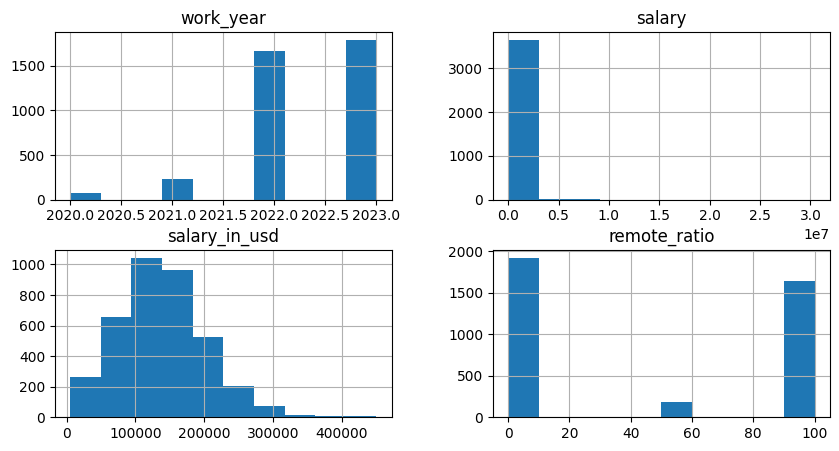

In [4]:
df.hist(figsize=(10,5))

In [26]:
df.isnull().sum() # Проверим данные на наличие пропусков

work_year               0
experience_level        0
employment_type         0
job_title               0
salary                101
salary_currency         0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
dtype: int64

Имеем 101 пропуск в столбце `employee_residence`, но перед тем как работать с пропусками тщательно исследуем наши данные

# Исследовательский анализ данных

## Работа с категориальными признаками

In [5]:
df.experience_level.unique() # Посмотрим на уникальные значения в столбце experience_level

array(['Сеньёр', 'Миддл', 'Джуниор', 'ТимЛид\\Директор'], dtype=object)

### Experience Level

Всего в столбце `expereince_level` 4 уникальных категориальных признаков:


*  EN, что означает `Джуниор`.

*   MI, что означает `Миддл`.

*   SE, что означает `Сеньёр`.

*   EX, что означает `ТимЛид\Директор`.


In [6]:
ex_level = df['experience_level'].value_counts()
ex_level

experience_level
Сеньёр             2516
Миддл               805
Джуниор             320
ТимЛид\Директор     114
Name: count, dtype: int64

In [7]:
ex_level = df['experience_level'].value_counts()
px.bar(ex_level,text_auto=True,labels={'value':'Количество вакансий', 'experience_level':'Опыт работы (опытность)'})

Из столбчатой диаграммы выше видно, что наибольшее кол-во аккаунтов имеют Сеньёры, потом уже Миддл, Джуниор, ТимЛид

### Должности

In [8]:
print('Количество уникальных наименований должностей в столбце job_title :', df['job_title'].nunique())

Количество уникальных наименований должностей в столбце job_title : 93


Посмотрим на топ-15 наиболее популярных должностей

In [9]:
top15_job_titles = df['job_title'].value_counts()[:15]

fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Топ-15 должностей')

fig.update_layout(xaxis_title = "Должность", yaxis_title = "Количество")
fig.show()

Первый топ занимает наша любимая тройка:
 - `Data Engineer `
 - `Data Scientist`
 - `Data Analyst`

### Тип занятости (Employment type)

In [11]:
df.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

Всего в столбце 4 уникальных категории : 


*   PT : Part-time

*   FT : Full-time

*   CT : Contract

*   FL : Freelance


In [12]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Распределение типа занятости')

fig.update_layout( xaxis_title = "Тип занятости", yaxis_title = "Количество")
fig.show()

Почти все работники имеют тип занятости `Full-Time`

### Страна проживания сотрудника

In [13]:
df.employee_residence.value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

In [14]:
top_15_emp_locations = df.employee_residence.value_counts()[:15]
fig = px.bar(y = top_15_emp_locations.values, x = top_15_emp_locations.index, 
            color = top_15_emp_locations.index, text_auto=True,
            title = 'Toп 15 Стран проживания')

fig.update_layout( xaxis_title = "Страна проживания", yaxis_title = "Количество")
fig.show()

### Размер компании 

In [15]:
group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text_auto=True,
             title = 'Распределение компаний по размеру')

fig.update_layout(xaxis_title = "Размер компании", yaxis_title = "Количество")
fig.show()

Размер компаний в основном состоит из средних компаний, а затем крупных, за которыми следуют маленькие стартапы.

## Работа с числовыми признаками

### Год работы

In [16]:
work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index, 
            title = 'Распределение по году работы')
fig.show()

Данные за 2023 год составляют около 47% в наборе данных, за которыми следуют данные за 2022 год и так далее. Это показывает огромный рост в данной области с течением лет!

### Зарплата в USD

In [17]:
fig = px.box(y = df['salary_in_usd'], title = 'Зарплата в USD')
fig.show()

In [ ]:
# df = df[df['salary_in_usd'] < 295000] # Избавимся от выбросов

In [18]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Распределение зарплаты в USD') 
fig.show()

Видно что в основном зарплата распределена в пределах 95/100k - 175/180k USD.

### Степень работы на удалёнке :)

Степень удаленной работы состоит из трёх типов : 


*   0 : Без удалённой работы (меньше 20%) 

*   50 : Частично удалённо

*   100 : Полностью удалённо (более 80%)

In [19]:
remote_type = ['Полностью удалённо', 'Частично удалённо', 'Не удалённо']

fig = px.bar(x = remote_type, y = df['remote_ratio'].value_counts().values,
       color = remote_type, text = df['remote_ratio'].value_counts().values,
       title = 'Распределение типа работы')

fig.update_layout( xaxis_title = "Тип работы", yaxis_title = "Количество")
fig.show()

Начиная с 2023 года, большинство компаний все еще придерживаются полностью удаленного формата работы, за которым следует гибридный / частично удаленный формат, а затем политика без удаленной работы.

# 3. Анализ года работы

Мы делаем это, чтобы проверить, не изменится ли со временем удаленное соотношение.

## Степень удалённой работы по годам

In [20]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['Без удалёнки', 'Частично удалённо', 'Полностью удалённо']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 степень удалённой работы'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 степень удалённой работы'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 степень удалённой работы'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 степень удалённой работы'))

fig.show()

Как видно из графика, мы наблюдаем, что:

Удаленная работа достигла максимума в 2021 году, и это можно объяснить пандемией. С течением времени политика удаленной работы не была вновь применена, как это произошло в 2023 году.

# 4. Анализ опыта работы

In [21]:
exp_type = df.groupby(['experience_level','employment_type']).size()
exp_type

experience_level  employment_type
Джуниор           CT                    2
                  FL                    2
                  FT                  302
                  PT                   14
Миддл             CT                    5
                  FL                    5
                  FT                  792
                  PT                    3
Сеньёр            CT                    2
                  FL                    3
                  FT                 2511
ТимЛид\Директор   CT                    1
                  FT                  113
dtype: int64

In [22]:
exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data = [
    go.Bar(name = 'Джуниор', x = exp_type['Джуниор'].index, 
           y = exp_type['Джуниор'].values, text = exp_type['Джуниор'].values),

    go.Bar(name = 'Миддл', x = exp_type['Миддл'].index, 
           y = exp_type['Миддл'].values, text = exp_type['Миддл'].values),

    go.Bar(name = 'Сеньёр', x = exp_type['Сеньёр'].index,
           y = exp_type['Сеньёр'].values, text = exp_type['Сеньёр'].values),
           
    go.Bar(name = 'ТимЛид\Директор', x = exp_type['ТимЛид\Директор'].index,
           y = exp_type['ТимЛид\Директор'].values, text = exp_type['ТимЛид\Директор'].values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Степень опытности в зависимости от типа занятости')

fig.show()

На полный рабочий день, наибольшее присутствие представлено старшими сотрудниками, за которыми следуют новички, а затем руководители.

## Топ-5 профессий, основанных на опыте

In [23]:
exp_job = df.groupby(['experience_level','job_title']).size()

entry_top5 = exp_job['Джуниор'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['ТимЛид\Директор'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Миддл'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Сеньёр'].sort_values(ascending = False)[:5]

exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Джуниор', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'ТимЛид\Директор', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Миддл', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Сеньёр', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Уровень опыта с наиболее распространенными профессиями.')
fig.show()

**Наблюдения**

* В Data Architect работает большое количество опытных людей.

* На начальном/юниорском уровне, как правило, больше занимаются Data Analyst, Data scientist, Data engineer.

* Middle-уровень наиболее распространён в Data Engineer, потом Data Analyst, Data Scientist.

* Уровень ТимЛида преобладает в Data Engineer, и совсем немного в Data Science.

## Размер компании учитывая опыт сотрудника

In [24]:
exp_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Джуниор', x = exp_size['Джуниор'].index,
           y = exp_size['Джуниор'].values, text = exp_size['Джуниор'].values),
    go.Bar(name = 'ТимЛид\Директор', x = exp_size['ТимЛид\Директор'].index,
           y = exp_size['ТимЛид\Директор'].values, text = exp_size['ТимЛид\Директор'].values),
    go.Bar(name = 'Миддл', x = exp_size['Миддл'].index,
           y = exp_size['Миддл'].values, text = exp_size['Миддл'].values),
    go.Bar(name = 'Сеньёр', x = exp_size['Сеньёр'].index,
           y = exp_size['Сеньёр'].values, text = exp_size['Сеньёр'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

**Наблюдения**:
 
* В крупных компаниях в основном старшие сотрудники, за ними следуют промежуточные, а затем новички. Очень мало руководителей.

* В компаниях среднего размера в основном старшее звено, затем среднее и начальное. Руководители немного выделяются по сравнению с крупными компаниями.

* Для малых компаний / стартапов, мы видим, что они состоят из всех трех уровней, кроме руководителей, пропорционально.

# 6. Анализ зарплат

## Зарплата сотрудника в по годам

In [25]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]
 
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Средняя зарплата по году'))

fig1.update_layout(title = 'Распределение зарплат по году')
fig2.update_layout(xaxis_title = "Год", yaxis_title = "Средняя зарплата")
fig1.show()
fig2.show()

Видим что с течением времени тренд на увеличение зарплаты растёт

## Зарплата основанная на опыте работы

In [26]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Джуниор']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'ТимЛид\Директор']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Миддл']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Сеньёр']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Джуниор', 'Миддл', 'Сеньёр', 'ТимЛид\Директор']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Средняя зарплата по опыту работы'))
                            
fig1.update_layout(title = 'Распределение зарплат по опыту работы')
fig2.update_layout(xaxis_title = "Опыт работы", yaxis_title = "Средняя запрплата")
fig1.show()
fig2.show()

Также видим увеличение зарплаты с увеличением опыта работы

## Зарплата в зависимости размера компании

In [27]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Размер компании: Маленькая\Стартап', 'Размер компании: Средняя', 'Размер компании: Большая']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Средняя зарплата в зависимости от размера компании'))

fig1.update_layout(title = 'Распределение заработной платы по размеру компании')
fig2.update_layout( xaxis_title = "Размер компании", yaxis_title = "Средняя зарплата")
fig1.show()
fig2.show()

Очевидно, что средние по размеру компании распределяются по более высоким зарплатам, а крупные компании имеют более высокие зарплаты, чем малые.

Таким образом, мы можем сделать вывод, что крупные компании не обязательно имеют более высокие зарплаты, чем средние.

## Топ должностей по зарплате

In [ ]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Должности", yaxis_title = "Зарплаты ")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Топ-25 должностей по зарплате')

Видим что наиболее высокие зарплаты имеют Research Scientist, Data Scientist, Data Analyst

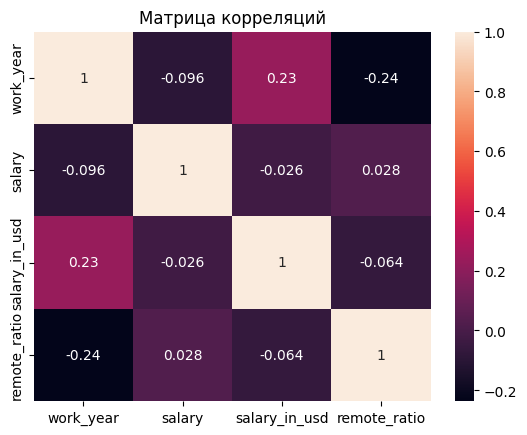

In [ ]:
sns.heatmap(df[['work_year','salary','salary_in_usd','remote_ratio']].corr(), annot = True)
plt.title('Матрица корреляций');

In [28]:
df.isna().sum()

work_year               0
experience_level        0
employment_type         0
job_title               0
salary                101
salary_currency         0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
dtype: int64

In [29]:
# Сгруппируем df по job_titile и найдем средние и медианные зарплаты для должностей
grouped_df = df.groupby(['job_title'],as_index=False).agg(mean_salary = ('salary','mean'),
                                             median_salary = ('salary','median'))
grouped_df

,job_title,mean_salary,median_salary
0,3D Computer Vision Researcher,120000.000000,35000.0
1,AI Developer,137181.818182,108000.0
2,AI Programmer,55000.000000,55000.0
3,AI Scientist,275312.500000,122500.0
4,Analytics Engineer,146655.934066,143200.0
...,...,...,...
88,Research Engineer,159268.303030,150000.0
89,Research Scientist,160037.641975,150000.0
90,Software Data Engineer,75000.000000,75000.0
91,Staff Data Analyst,NaN,NaN


In [41]:
#df.loc[(df.job_title == 'AI Developer') & (df.salary.isna()), "salary"]
grouped_df.loc[grouped_df.job_title == 'AI Developer','median_salary']

1    108000.0
Name: median_salary, dtype: float64

In [30]:
for name in grouped_df['job_title']:
    df.loc[(df.job_title == name) & (df.salary.isna()), "salary"] = grouped_df.loc[grouped_df.job_title == name,'median_salary'].values[0]

In [31]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                3
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
df.fillna(df.salary.median(),inplace=True)

In [42]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64